In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [2]:
#reading data
data = pd.read_csv('wk3_kc_house_train_data.csv')

In [3]:
data.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875  20141209T000000   604000.0         4       3.00         1960   
1  7237550310  20140512T000000  1225000.0         4       4.50         5420   
2  9212900260  20140527T000000   468000.0         2       1.00         1160   
3   114101516  20140528T000000   310000.0         3       1.00         1430   
4  6054650070  20141007T000000   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5000     1.0           0     0  ...      7        1050            910   
1    101930     1.0           0     0  ...     11        3890           1530   
2      6000     1.0           0     0  ...      7         860            300   
3     19901     1.5           0     0  ...      7        1430              0   
4      9680     1.0           0     0  ...      7        1370              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1965             0    98136  47.5208 -122.393           1360   
1      2001             0    98053  47.6561 -122.005           4760   
2      1942             0    98115  47.6900 -122.292           1330   
3      1927             0    98028  47.7558 -122.229           1780   
4      1977             0    98074  47.6127 -122.045           1370   

   sqft_lot15  
0        5000  
1      101930  
2        6000  
3       12697  
4       10208  

[5 rows x 21 columns]

In [4]:
#shape of the data
data.shape

(9761, 21)

In [5]:
#List of columns
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

##### EDA

In [396]:
#Dropping these unsuitable variables for analysis
data = data.drop(['id','zipcode','lat','long','date'],axis=1)

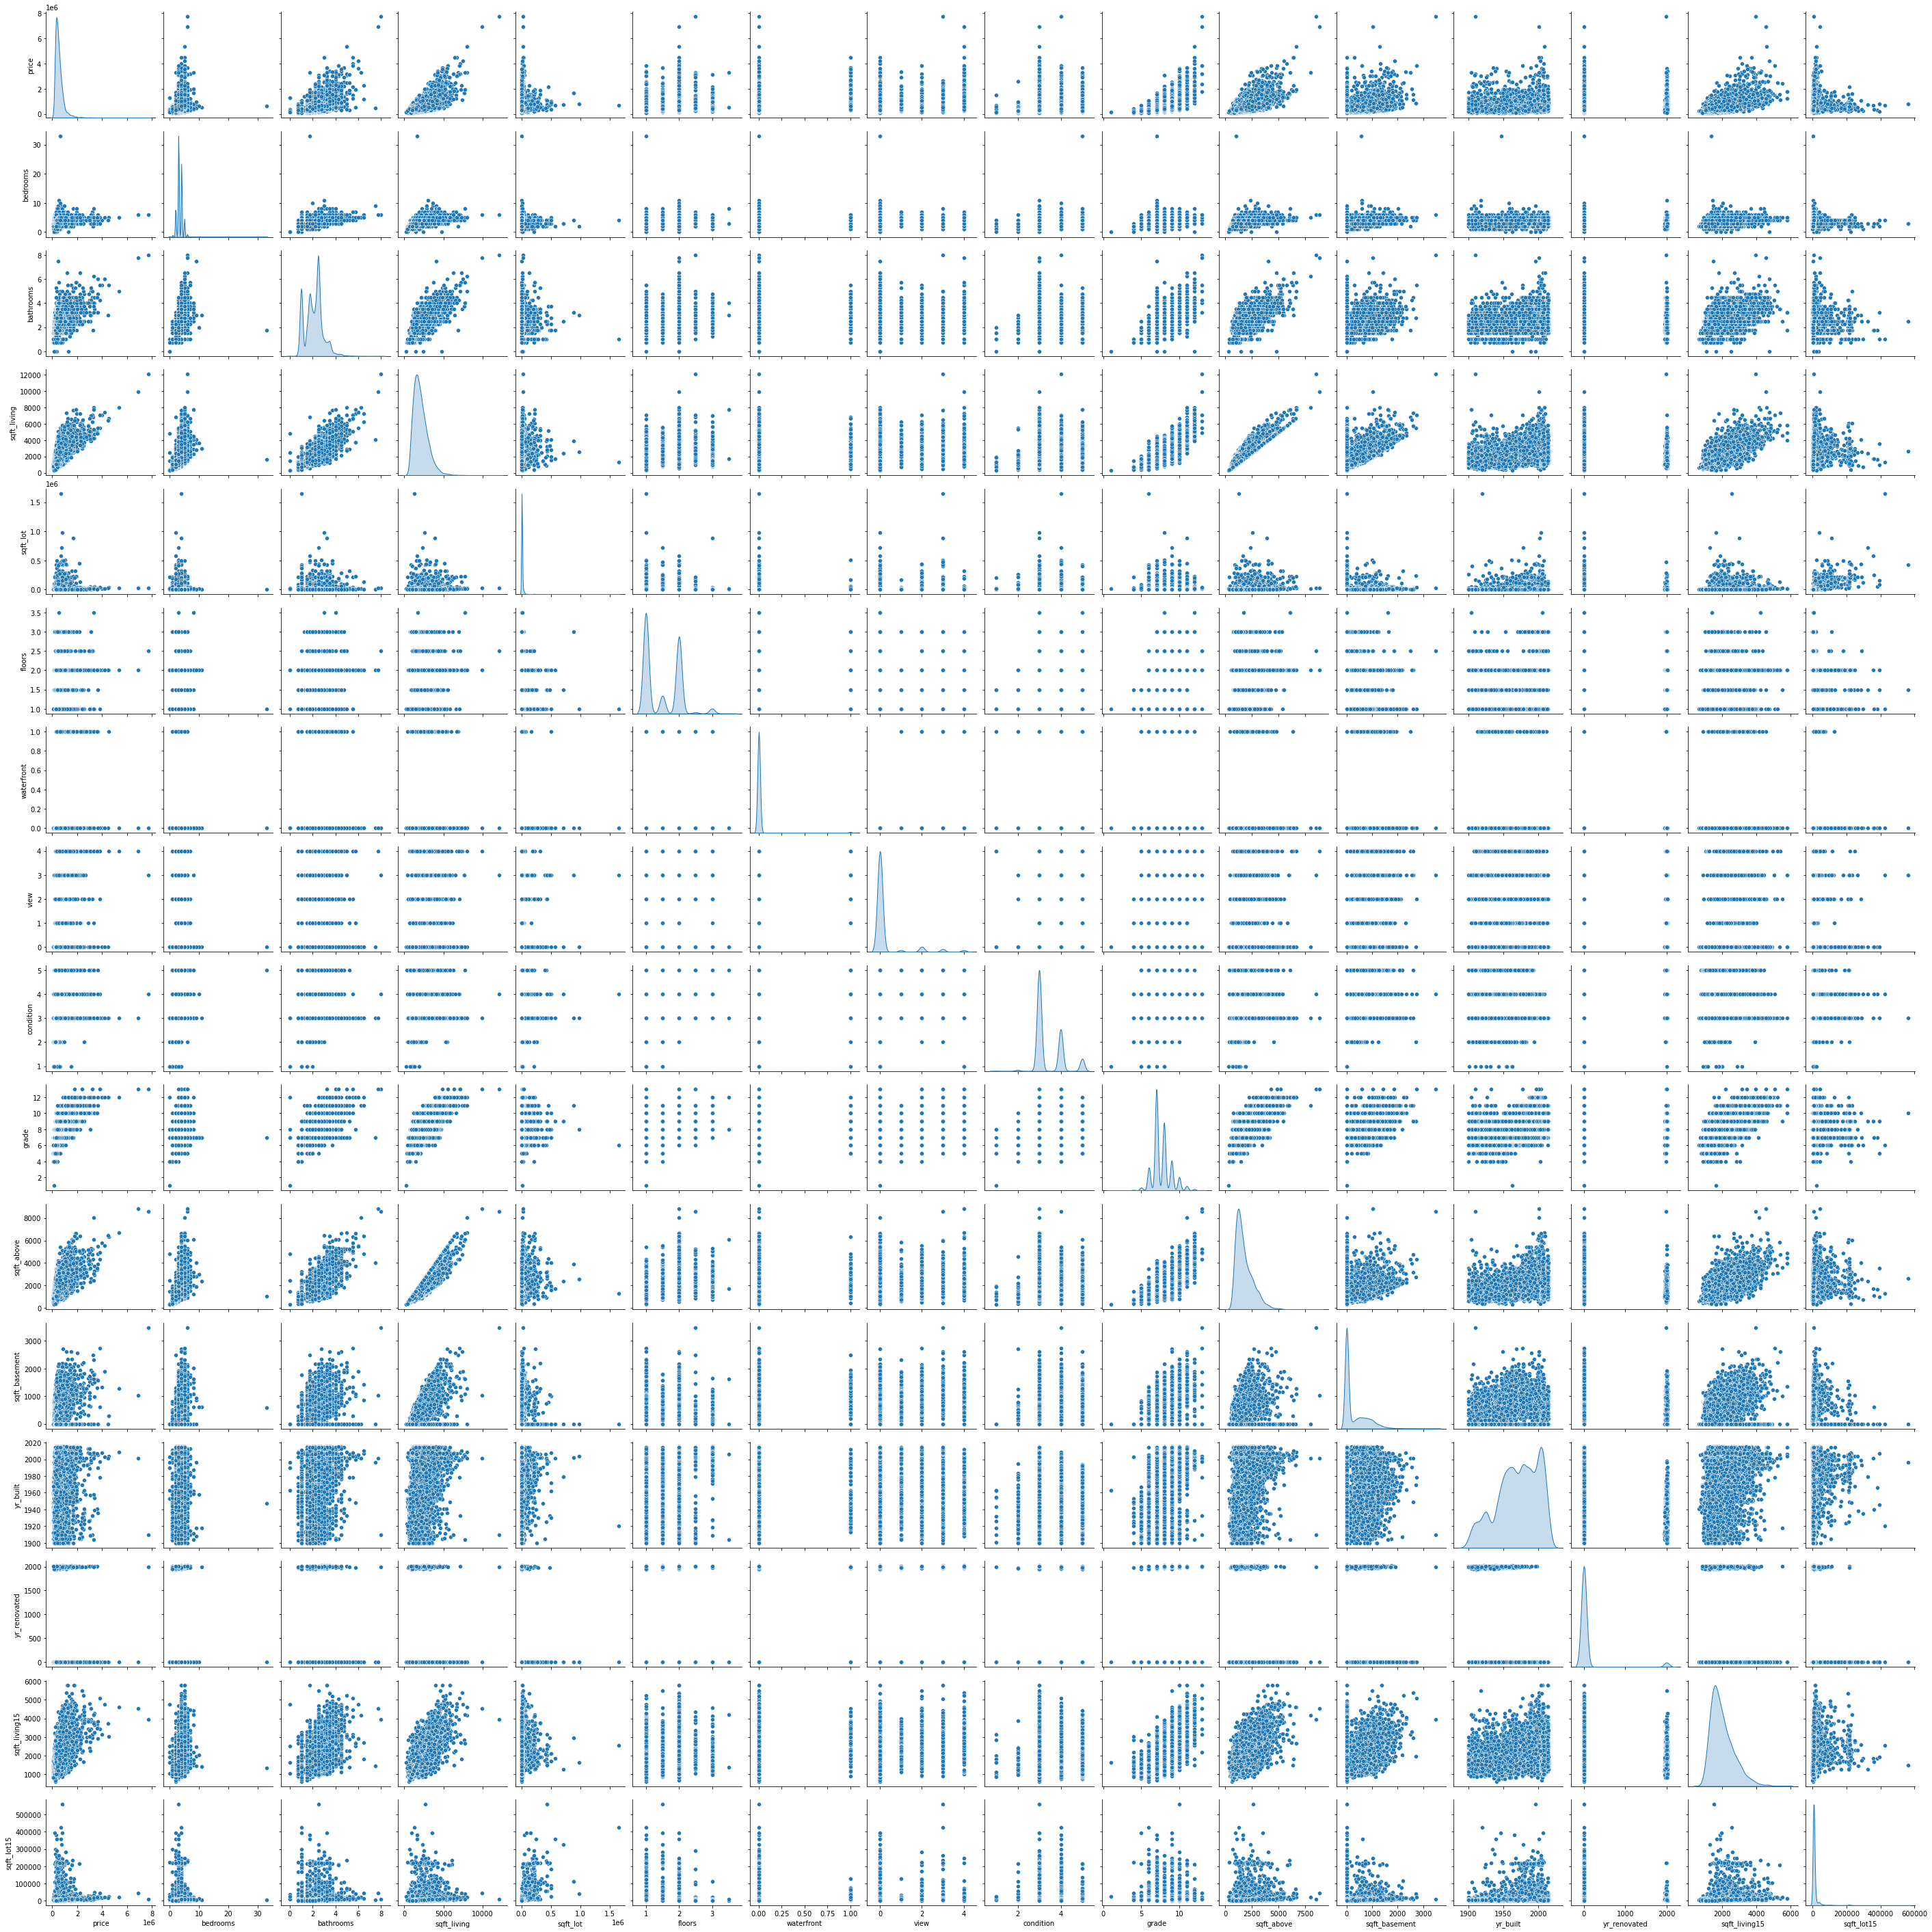

In [2379]:
#Plotting the pairplot for the data for analysis
sns.pairplot(data,diag_kind='kde')

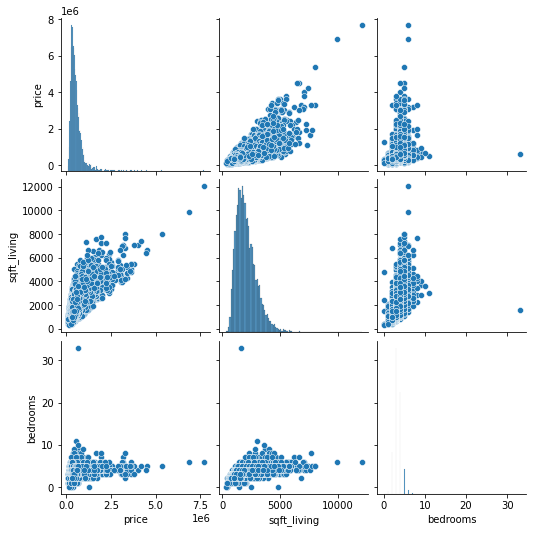

In [6]:
#Checking variable effecting price
sns.pairplot(data[['price','sqft_living','bedrooms']])

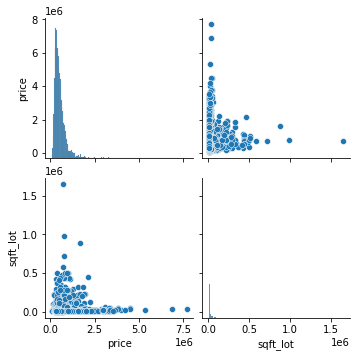

In [2381]:
#Checking variable effecting price
sns.pairplot(data = data[['price','sqft_lot']],diag_kind='hist')

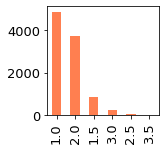

In [2384]:
#Univariate analysis
data['floors'].value_counts().plot(kind='bar',figsize=(2,2),color="coral",fontsize=13)
plt.show()

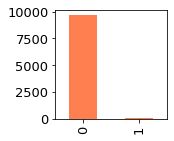

In [2385]:
#Univariate analysis
data["waterfront"].value_counts().plot(kind='bar',figsize=(2,2),color="coral",fontsize=13)
plt.show()

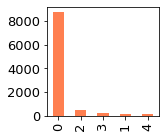

In [2386]:
data["view"].value_counts().plot(kind='bar',figsize=(2,2),color="coral",fontsize=13)
plt.show()

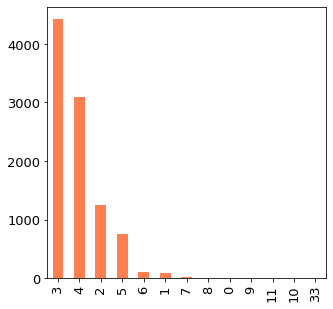

In [2387]:
#Univariate analysis
data["bedrooms"].value_counts().plot(kind='bar',figsize=(5,5),color="coral",fontsize=13)
plt.show()

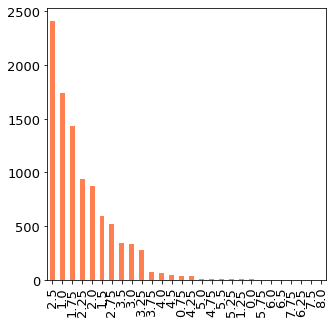

In [2388]:
#Univariate analysis
data["bathrooms"].value_counts().plot(kind='bar',figsize=(5,5),color="coral",fontsize=13)
plt.show()

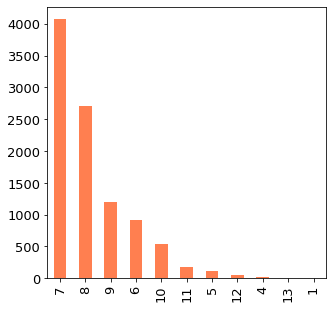

In [2389]:
#Univariate analysis
data["grade"].value_counts().plot(kind='bar',figsize=(5,5),color="coral",fontsize=13)
plt.show()

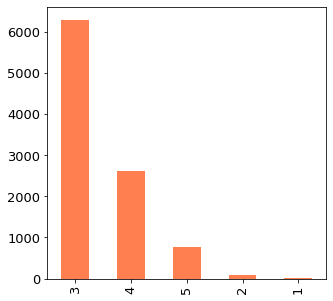

In [2390]:
#Univariate analysis
data["condition"].value_counts().plot(kind='bar',figsize=(5,5),color="coral",fontsize=13)
plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

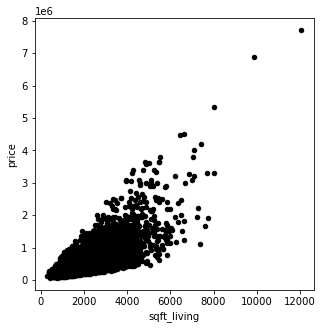

In [2391]:
#Bi-variate Analysis
data.plot(kind="scatter",y="price",x="sqft_living",color="black",figsize=(5,5))

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

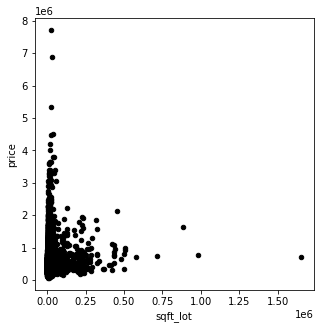

In [2393]:
#Bi-variate Analysis
data.plot(kind="scatter",y="price",x="sqft_lot",color="black",figsize=(5,5))

<AxesSubplot:xlabel='yr_built', ylabel='yr_renovated'>

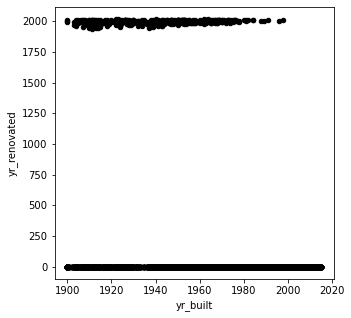

In [2395]:
#Bi-variate Analysis
data.plot(kind="scatter",y="yr_renovated",x="yr_built",color="black",figsize=(5,5))

In [2396]:
#Group description for variables
data[['yr_renovated','grade']].groupby(['yr_renovated']).describe()

grade                                                
               count      mean       std  min   25%  50%   75%   max
yr_renovated                                                        
0             9340.0  7.658351  1.180598  1.0  7.00  7.0  8.00  13.0
1940             1.0  6.000000       NaN  6.0  6.00  6.0  6.00   6.0
1945             2.0  6.500000  0.707107  6.0  6.25  6.5  6.75   7.0
1946             2.0  6.500000  0.707107  6.0  6.25  6.5  6.75   7.0
1950             1.0  6.000000       NaN  6.0  6.00  6.0  6.00   6.0
...              ...       ...       ...  ...   ...  ...   ...   ...
2011             7.0  7.571429  0.786796  7.0  7.00  7.0  8.00   9.0
2012             4.0  7.750000  1.258306  6.0  7.50  8.0  8.25   9.0
2013            13.0  7.769231  1.091928  6.0  7.00  8.0  8.00  10.0
2014            42.0  7.500000  0.993884  6.0  7.00  7.5  8.00  10.0
2015             5.0  8.600000  0.894427  8.0  8.00  8.0  9.00  10.0

[65 rows x 8 columns]

In [8]:
#Group description for variables
data[['yr_renovated','price']].groupby(['yr_renovated']).describe()

price                                                     \
               count           mean            std       min        25%   
yr_renovated                                                              
0             9340.0  533061.782120  361375.554379   80000.0  318150.00   
1940             1.0  313300.000000            NaN  313300.0  313300.00   
1945             2.0  470000.000000  134350.288425  375000.0  422500.00   
1946             2.0  351137.500000  281234.044547  152275.0  251706.25   
1950             1.0  152900.000000            NaN  152900.0  152900.00   
...              ...            ...            ...       ...        ...   
2011             7.0  583571.428571  229760.641497  329000.0  422000.00   
2012             4.0  581250.000000  308825.058353  330000.0  420000.00   
2013            13.0  703326.923077  359122.938917  255000.0  410000.00   
2014            42.0  656307.357143  336260.852447  180000.0  409750.00   
2015             5.0  804000.000000  442526.835344  285000.0  585000.00   

                                              
                   50%        75%        max  
yr_renovated                                  
0             447000.0  635000.00  6885000.0  
1940          313300.0  313300.00   313300.0  
1945          470000.0  517500.00   565000.0  
1946          351137.5  450568.75   550000.0  
1950          152900.0  152900.00   152900.0  
...                ...        ...        ...  
2011          507000.0  723500.00   958000.0  
2012          482500.0  643750.00  1030000.0  
2013          700000.0  855000.00  1400000.0  
2014          604500.0  829000.00  1697000.0  
2015          815000.0  850000.00  1485000.0  

[65 rows x 8 columns]

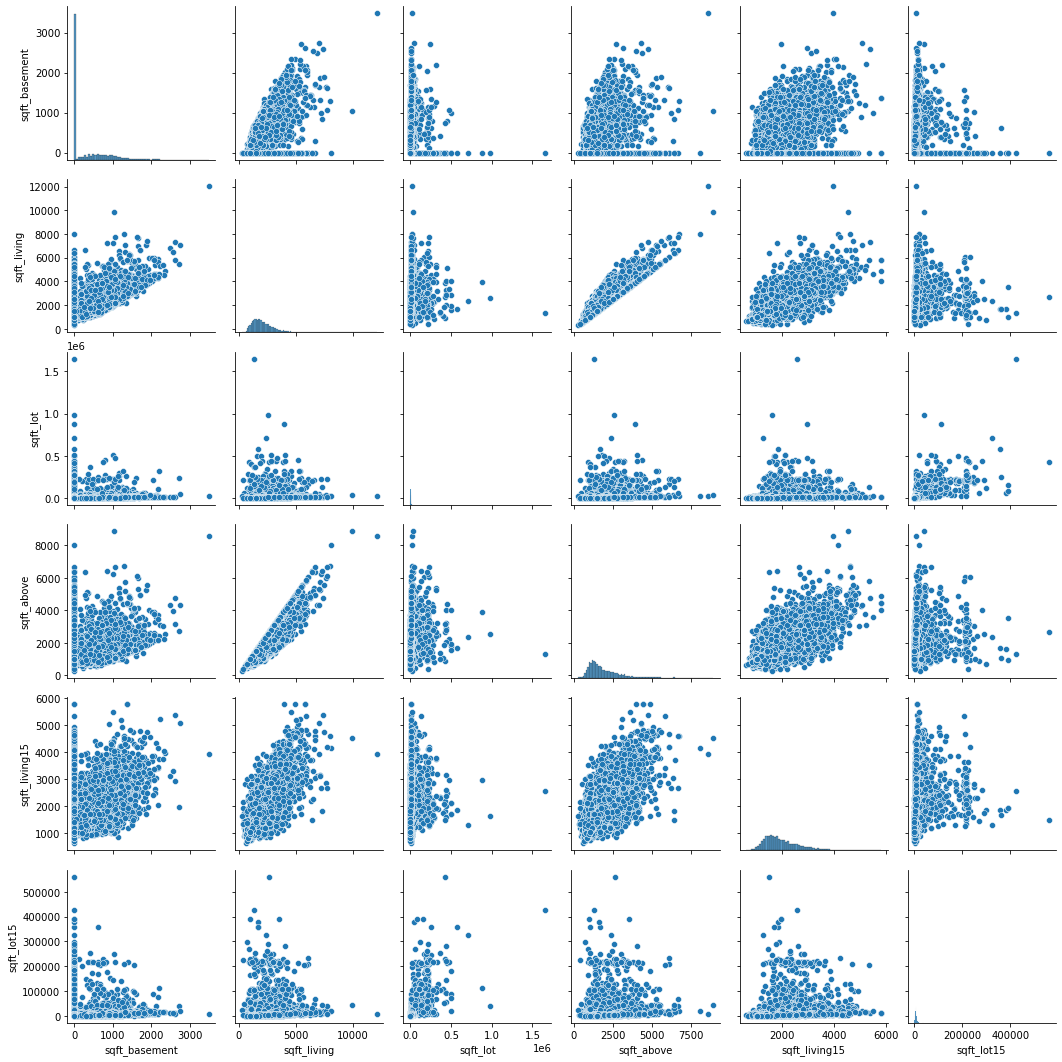

In [9]:
#Relation between sqft variables
sns.pairplot(data = data[['sqft_basement','sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']],
             diag_kind='hist')

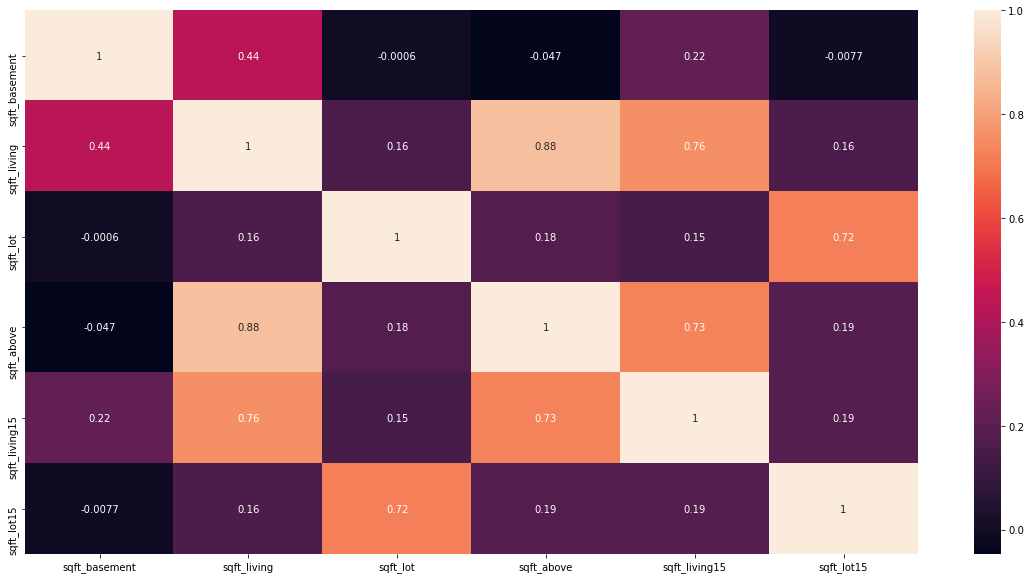

In [2398]:
#Heat-map for correlation of selected variables
plt.figure(figsize=(20,10))
sns.heatmap(data[['sqft_basement','sqft_living','sqft_lot','sqft_above','sqft_living15','sqft_lot15']].corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='sqft_basement', ylabel='sqft_living'>

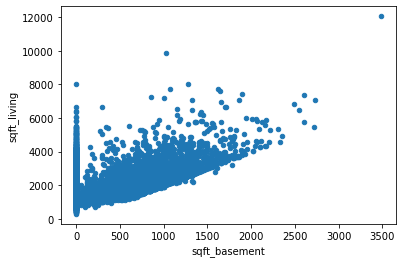

In [2399]:
#Scatter plot for sqft variable
data.plot(kind='scatter',x='sqft_basement',y='sqft_living')

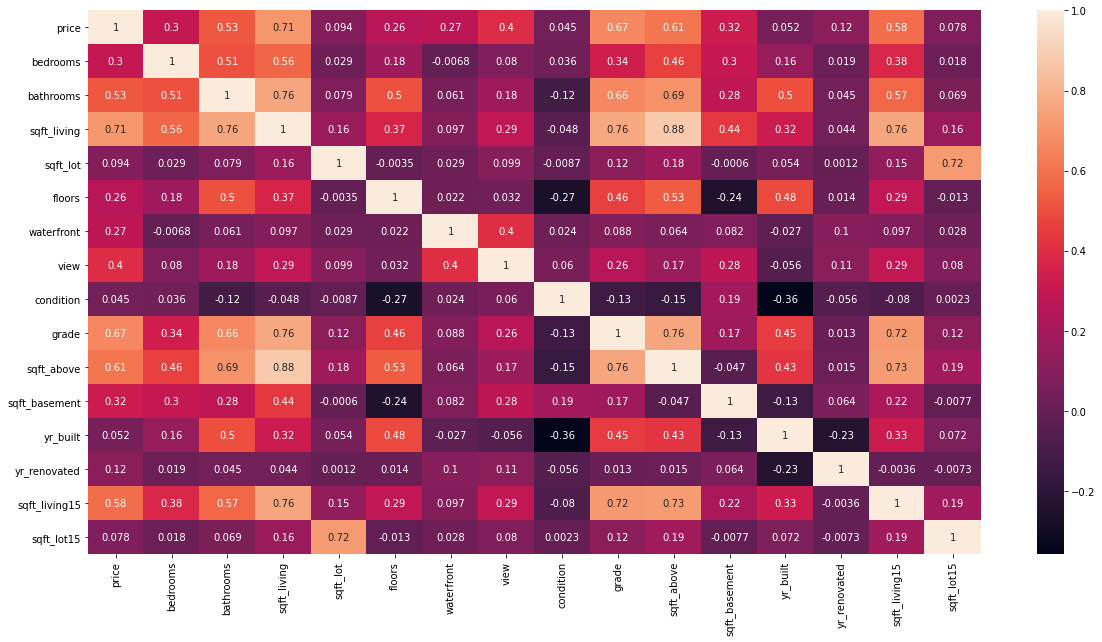

In [348]:
#Heatmap of all the selected variables
plt.figure(figsize=(20,10))
sns.heatmap(dat[['price','bedrooms','bathrooms','sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition','grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']].corr(),annot=True)
plt.show()

In [2495]:
#To check the Box plots and detect outliers
def PV(data , variable):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(data[variable])
    plt.show
    
    plt.subplot(1,2,2)
    plt.boxplot(data[variable])
    plt.show

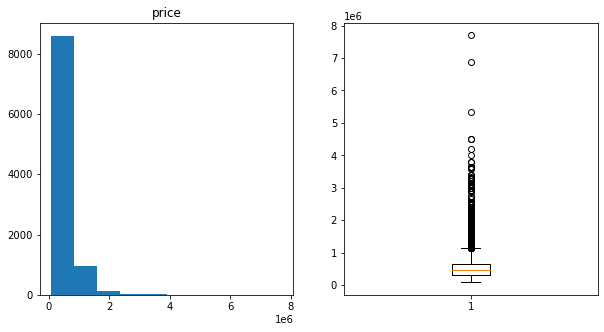

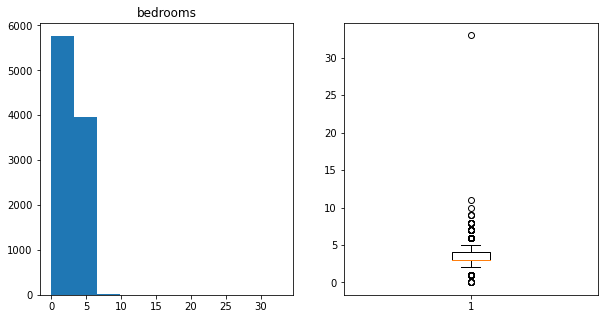

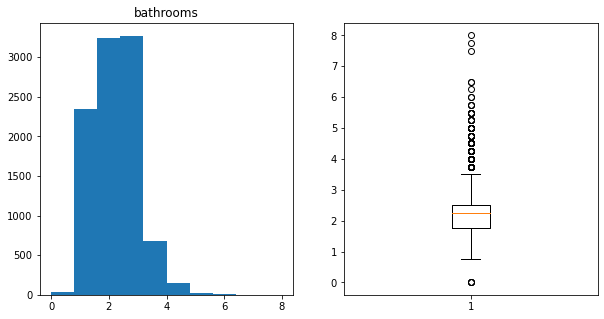

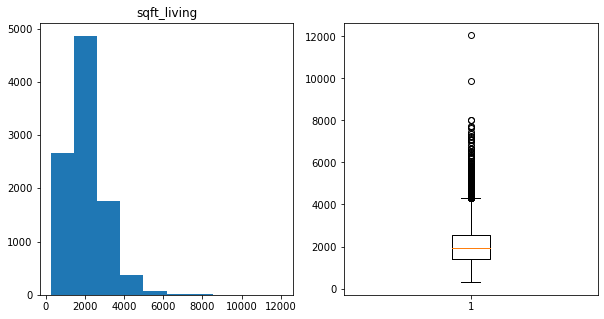

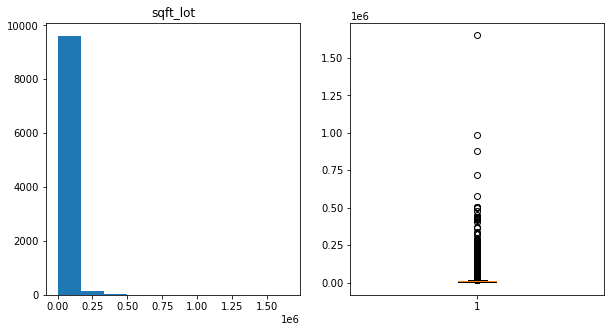

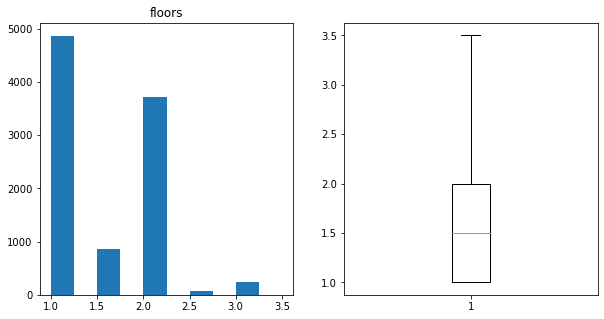

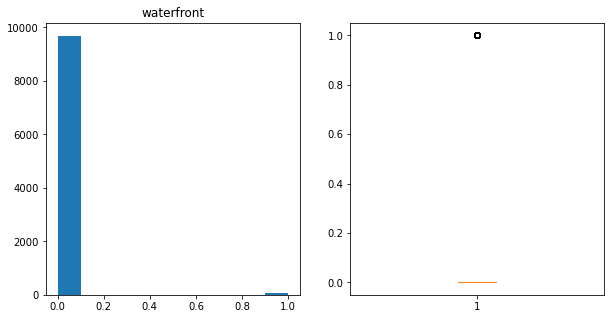

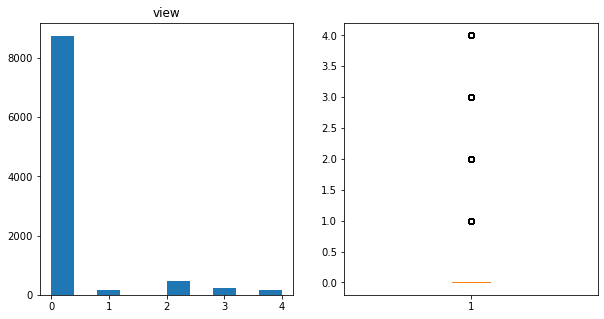

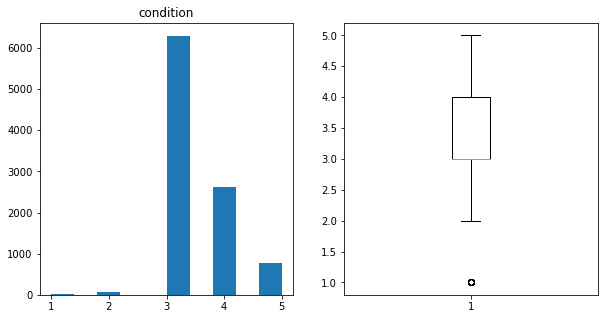

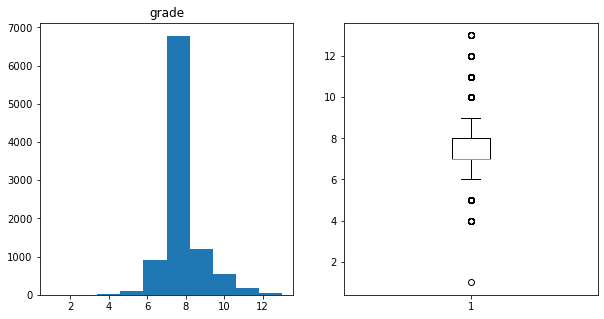

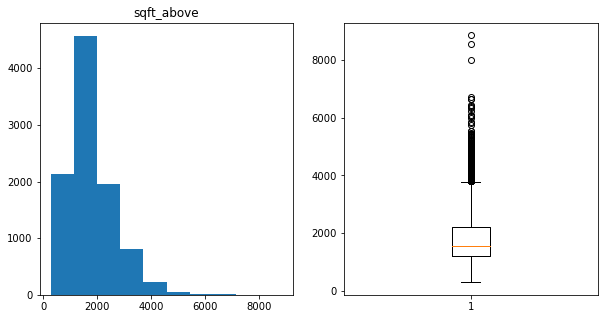

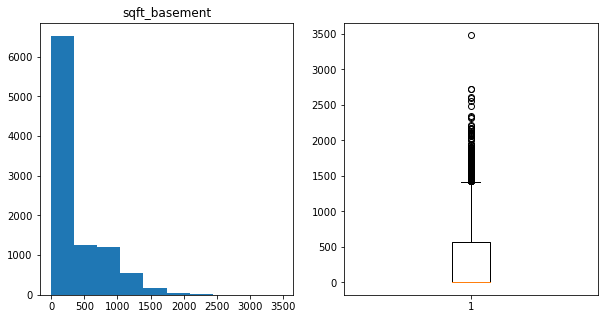

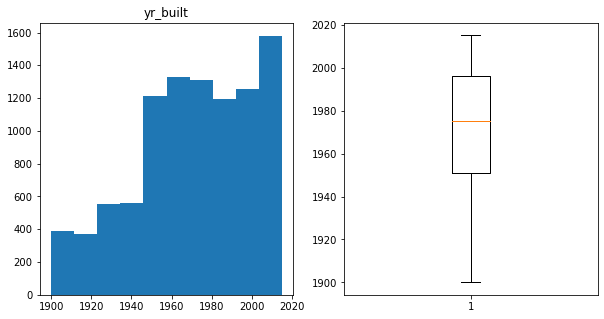

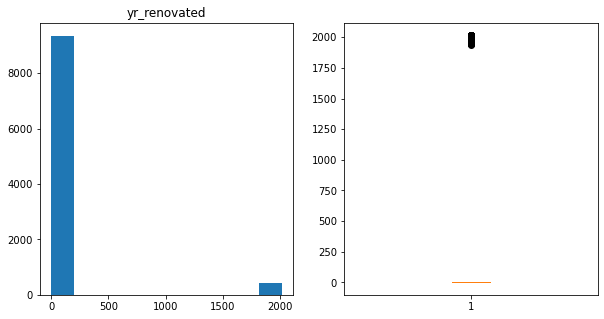

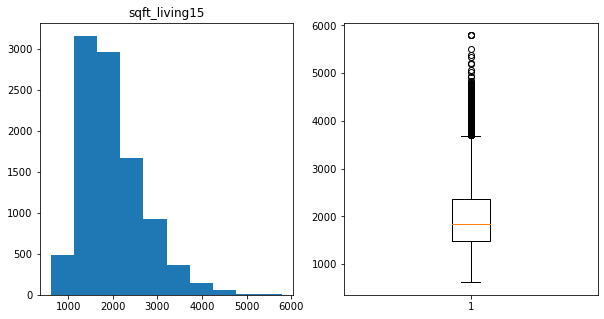

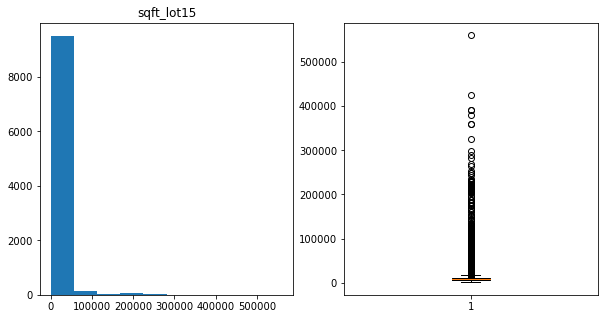

In [17]:
#this plots all the boxplots of the features in the data
for c in data.columns:
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.hist(data[c])
        plt.show

        plt.title(c)
        plt.subplot(1,2,2)
        plt.boxplot(data[c])
        plt.show

In [18]:
#Function to remove outliers
def out(da,col):
    Q1 = da[col].quantile(.25)
    Q3 = da[col].quantile(.75)
    IQR=Q3-Q1
    lower_l = Q1 - IQR*1.5
    upper_l = Q3 + IQR*1.5
    c = da[(da[col]>lower_l) & (da[col]<upper_l)]
    return c

In [20]:
#removing outliers in target variable
data = out(data,'price')

In [22]:
#removing outliers in sqft
data = out(data, 'sqft_living')

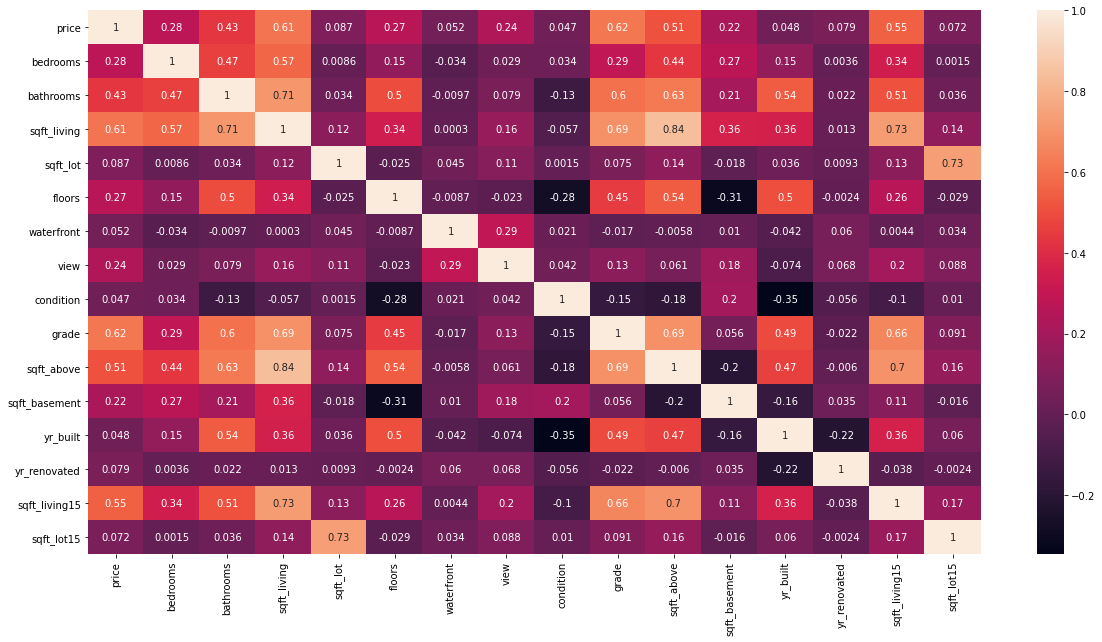

In [23]:
#heat map of changed data
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

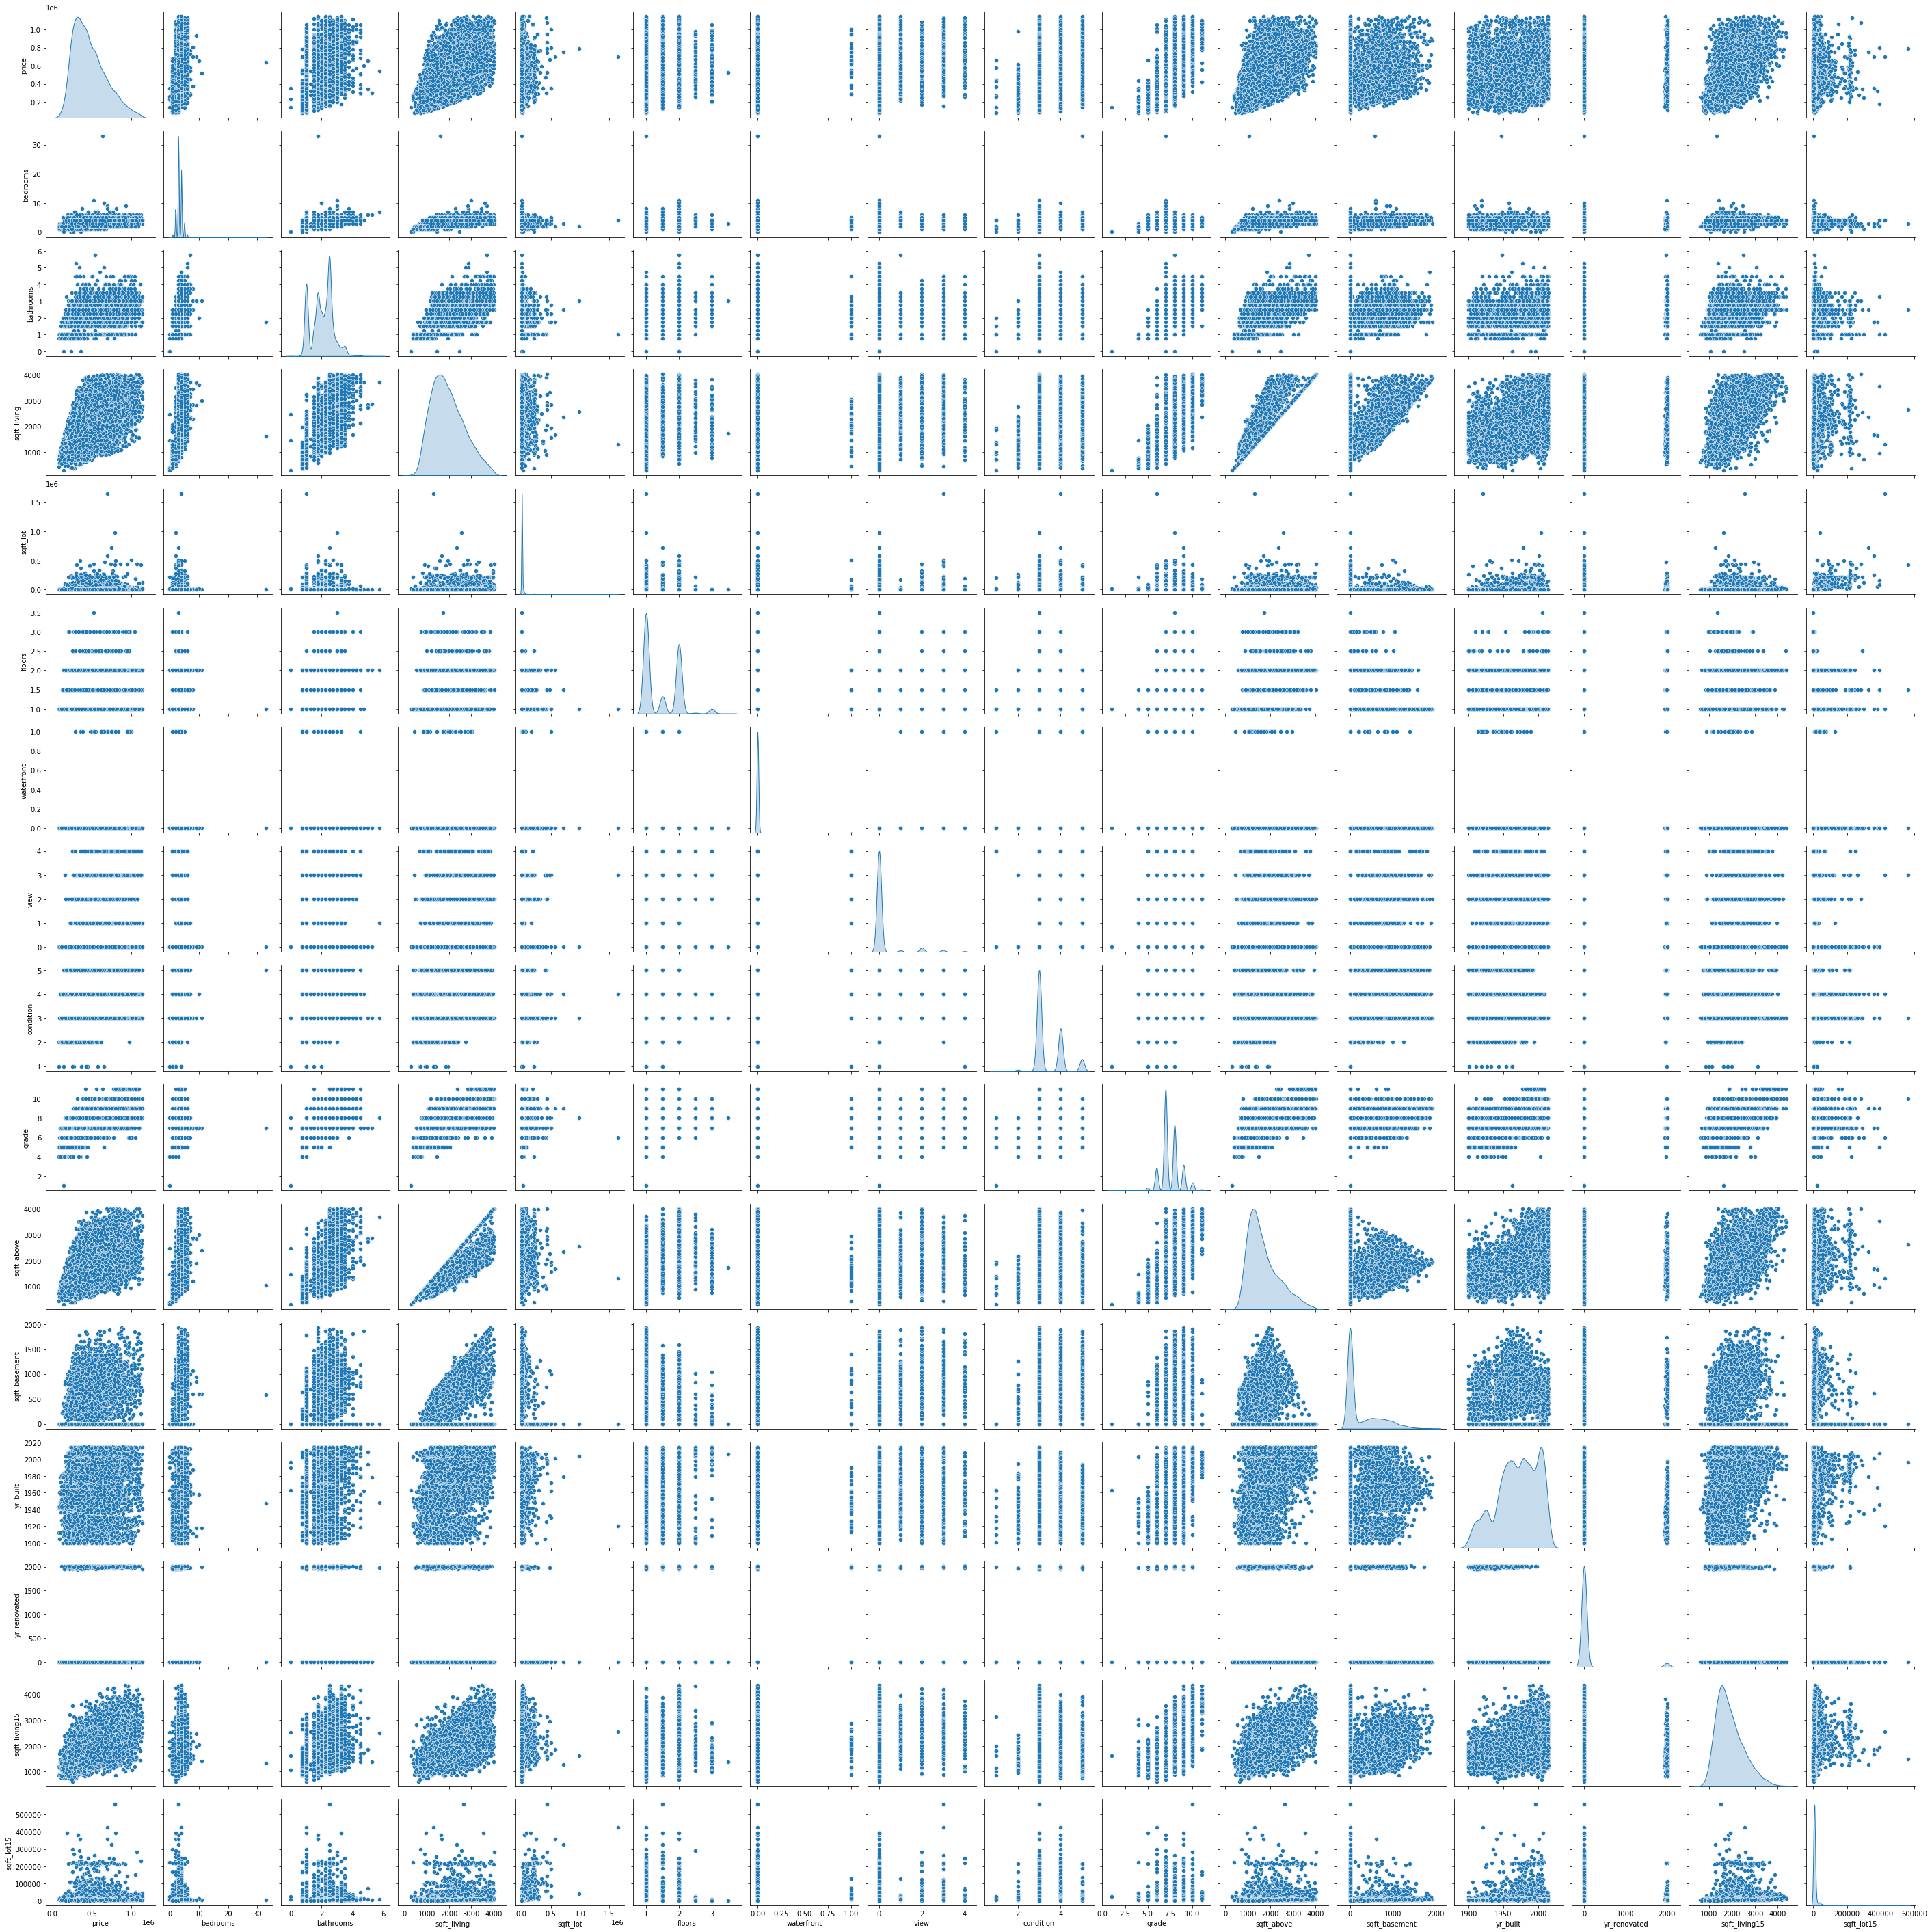

In [24]:
#pairplot of changed data
sns.pairplot(data=data,diag_kind='kde')

## Initial Fit

In [28]:
#Function of multiple linear regression
def MLG(X_train,y_train,X_test,y_test):
    #Standardizing data
    #empty list for score recording
    arr = []
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    sc_y = StandardScaler()
    y_train = sc_y.fit_transform(y_train.reshape(-1,1))
    y_test = sc_y.fit_transform(y_test.reshape(-1,1))
    
    # Fitting Multiple Linear Regression to the Training set
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)
    #y_pred = np.exp(y_pred)
    
    #recording the scores
    arr.append(MAPE(y_pred,y_test))
    arr.append(RMSE(y_pred,y_test))
    arr.append(regressor.score(X_train,y_train))
    
    #returning the array of scores
    return arr

In [74]:
#This fuction is for linear regression for transformed features
def MLG2(X_train,y_train,X_test,y_test):
    #Standardizing data
    #empty list for score recording
    arr = []
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    sc_y = StandardScaler()
    y_train = sc_y.fit_transform(y_train.reshape(-1,1))
    y_test = sc_y.fit_transform(y_test.reshape(-1,1))
    
    # Fitting Multiple Linear Regression to the Training set
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)
    #y_pred = np.exp(y_pred)
    #y_pred = np.square(y_pred)
    
    #Recording the scores
    arr.append(MAPE(y_pred,y_test))
    arr.append(RMSE(y_pred,y_test))
    arr.append(regressor.score(X_train,y_train))
    
    #Returning the array of scores
    return arr

In [30]:
#This is a 10-fold cross validation 
def kf():
    from sklearn.model_selection import KFold
    
    #this splits the indexes
    kf = KFold(n_splits=10)
    kf.get_n_splits(10)
    
    #arrays for storing the scores
    mape = []
    rmse = []
    r2 = []

    #this loop fetches the splitted indexes
    for train_index, test_index in kf.split(X):

        #splitted indexes are assigned for train and test
        X_train, X_test ,y_train, y_test= X[train_index], X[test_index], y[train_index], y[test_index]
        b = MLG(X_train,y_train,X_test,y_test)
        
        #Appending the scores of each fold
        mape.append(b[0])
        rmse.append(b[1])
        r2.append(b[2])

    #printing the mean of the 10 fold scores
    print('MAPE:',np.mean(mape))
    print('RMSE:',np.mean(rmse))
    print('R2:',np.mean(r2))

In [31]:
#this is for final model kf
def kf2(X,y):
    from sklearn.model_selection import KFold
    
    #this splits the indexes
    kf = KFold(n_splits=10)
    kf.get_n_splits(10)
    
    #arrays for storing the scores
    mape = []
    rmse = []
    r2 = []
    
    #this loop fetches the splitted indexes
    for train_index, test_index in kf.split(X):

        #splitted indexes are assigned for train and test        
        X_train, X_test ,y_train, y_test= X[train_index], X[test_index], y[train_index], y[test_index]
        b = MLG2(X_train,y_train,X_test,y_test)
        
        #Appending the scores of each fold        
        mape.append(b[0])
        rmse.append(b[1])
        r2.append(b[2])

    #printing the mean of the 10 fold scores
    print('MAPE:',np.mean(mape))
    print('RMSE:',np.mean(rmse))
    print('R2:',np.mean(r2))

In [32]:
#For getting the RMSE values
from sklearn.metrics import mean_squared_error
def RMSE(y_pred,y_test):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

In [33]:
#For getting the MAPE values
def MAPE(y_pred,y_test):
    return np.sum(y_pred/y_test)/len(X)

##### Testing for the model of all the variables

In [51]:
X = data.drop('price',axis=1).values
y = data['price'].values

In [53]:
kf()

MAPE: 0.11110648339745643
RMSE: 0.5884550331150606
R2: 0.6572359479049834


#### Testing for each of the variable sets of high correlation with the price

In [ ]:
['sqft_living','yr_built','bathrooms','grade']
['bedrooms','waterfront','sqft_living','grade']
['sqft_living','view','sqft_lot','grade']
['sqft_living','waterfront','grade','sqft_lot15']
['sqft_living','sqft_lot','waterfront','yr_built']

#### 1

In [54]:
X = data[['sqft_living','yr_built','bathrooms','grade']].values
y = data['price'].values

In [55]:
kf()

MAPE: 0.0822577111372971
RMSE: 0.6244430795819151
R2: 0.6088911535708569


#### 2

In [56]:
X = data[['bedrooms','waterfront','sqft_living','grade']].values
y = data['price'].values

In [57]:
kf()

MAPE: 0.04405350200593634
RMSE: 0.6531744101814814
R2: 0.581742731548362


#### 3

In [58]:
X = data[['sqft_living','view','sqft_lot','grade']].values
y = data['price'].values

In [59]:
kf()

MAPE: 0.09461803807880871
RMSE: 0.656536011386567
R2: 0.5743548165343816


#### 4

In [60]:
X = data[['sqft_living','waterfront','grade','sqft_lot15']].values
y = data['price'].values

In [61]:
kf()

MAPE: 0.04044204369114814
RMSE: 0.6553184304815464
R2: 0.5784190885289939


#### 5

In [62]:
X = data[['sqft_living','sqft_lot','waterfront','yr_built']].values
y = data['price'].values

In [63]:
kf()

MAPE: 0.06290363301340172
RMSE: 0.6561642137277313
R2: 0.5708007488267346


### Feature Engineering

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

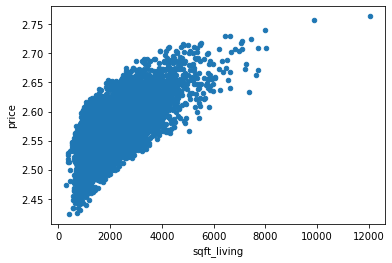

In [380]:
datas = data

#Changing the sqft variables to sqft by addition
#datas['sqft'] = datas['sqft_basement']+datas['sqft_above']+datas['sqft_living']

#Tranforming the sqft to square root
#datas['sqft'] = np.sqrt(datas['sqft'])

#taking log of the price variable
datas['price']=np.log(datas['price'])
datas.plot(kind='scatter',x='sqft_living',y='price')
#datas['grade'] = np.sqrt(datas['grade'])

In [381]:
#checking the scores after the feature transformation
X = datas[['sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']].values
y = datas['price'].values

In [382]:
kf2(X,y)

MAPE: -0.07534276595147597
RMSE: 0.6060923109753382
R2: 0.6323767219550384


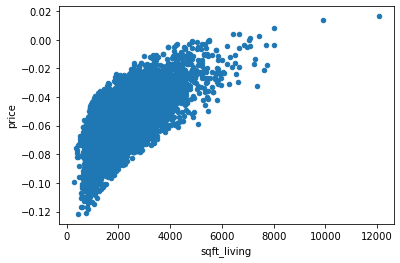

In [371]:
datas = data
#datas['sqft'] = np.sqrt(datas['sqft'])
#datas['price']=np.log(datas['price'])
datas.plot(kind='scatter',x='sqft_living',y='price')
datas['grade'] = np.sqrt(datas['grade'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

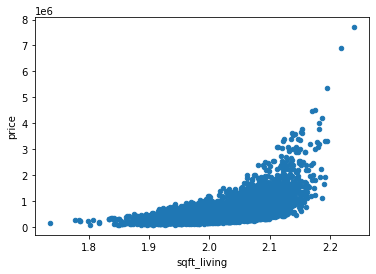

In [398]:
datas = data
#datas['sqft'] = datas['sqft_basement']+datas['sqft_above']+datas['sqft_living']
#datas['price'] = np.sqrt(datas['price'])
datas['sqft_living']=np.log(datas['sqft_living'])
datas.plot(kind='scatter',x='sqft_living',y='price')
#datas['grade'] = np.sqrt(datas['grade'])

In [399]:
#checking the scores after the feature transformation
X = datas[['sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']].values
y = datas['price'].values

In [400]:
kf2(X,y)

MAPE: 0.08540713677240808
RMSE: 0.5703927192565643
R2: 0.6788452923914


In [390]:
datas = data
datas['sqft'] = datas['sqft_basement']+datas['sqft_above']+datas['sqft_living']
datas['sqft'] = np.sqrt(datas['sqft'])
#datas['price']=np.log(datas['price'])
#datas.plot(kind='scatter',x='sqft',y='price')
datas['grade'] = np.sqrt(datas['grade'])

In [391]:
#checking the scores after the feature transformation
X = datas.drop('price',axis=1).values
y = datas['price'].values

In [392]:
kf2(X,y)

MAPE: 0.09100817989849862
RMSE: 0.557776399617923
R2: 0.6970370001012984


### One Hot Encoding

In [148]:
#This is the best transforamtion recorded
datas = data
datas['sqft'] = datas['sqft_basement']+datas['sqft_above']+datas['sqft_living']
datas['sqft'] = np.sqrt(datas['sqft'])
#datas['price']=np.log(datas['price'])
#datas.plot(kind='scatter',x='sqft',y='price')
datas['grade'] = np.sqrt(datas['grade'])

In [149]:
#checking the scores after the feature transformation
X = datas[['sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']].values
y = datas['price'].values

In [150]:

# Encoding categorical data Waterfront
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
labelencoder = LabelEncoder()
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [152]:
#After 1 hot encoding this is the score
kf2(X,y)

MAPE: 0.10855763969456662
RMSE: 0.6057737906382739
R2: 0.6324588490781781


#### Sticking back to original feature

#### Trying different transformation for getting the best score

In [162]:
#Importing again to check different features and transformation
das1 = pd.read_csv('wk3_kc_house_train_data.csv')
das1 = das1.drop(['zipcode','id','lat','long'],axis=1)

In [163]:
#Converting the date to year month and date to check the correlation
das1['date'] = pd.to_datetime(das1['date'])
das1['year'] = das1['date'].dt.year
das1['month'] = das1['date'].dt.month
das1['day'] = das1['date'].dt.day

In [164]:
#Tranforming the sqft variables
das1['sqft'] = das1['sqft_basement']+das1['sqft_above']+das1['sqft_living']

In [158]:
#Taking log of sqft
das1['sqft'] = np.log(das1['sqft'])

In [159]:
#taking log of sqft_living
das1['sqft_living'] = np.log(das1['sqft_living'])

In [160]:
#taking square of grade
das1['grade'] = np.square(das1['grade'])

In [165]:
#ceil to remove the decimals
das1['bathrooms'] = np.ceil(das1['bathrooms'])

In [166]:
#ceil to remove the decimals
das1['bedrooms'] = np.ceil(das1['bedrooms'])

In [167]:
#converting to int
das1['bathrooms'] = das1['bathrooms'].astype(int)

In [168]:
#converting to int
das1['bedrooms'] = das1['bedrooms'].astype(int)

In [169]:
#ceil to remove the decimals
das1['floors'] = np.ceil(das1['floors'])

In [170]:
#converting to int
das1['floors'] = das1['floors'].astype(int)

In [171]:
das1['Total_Area'] = das1['sqft']*das1['floors']

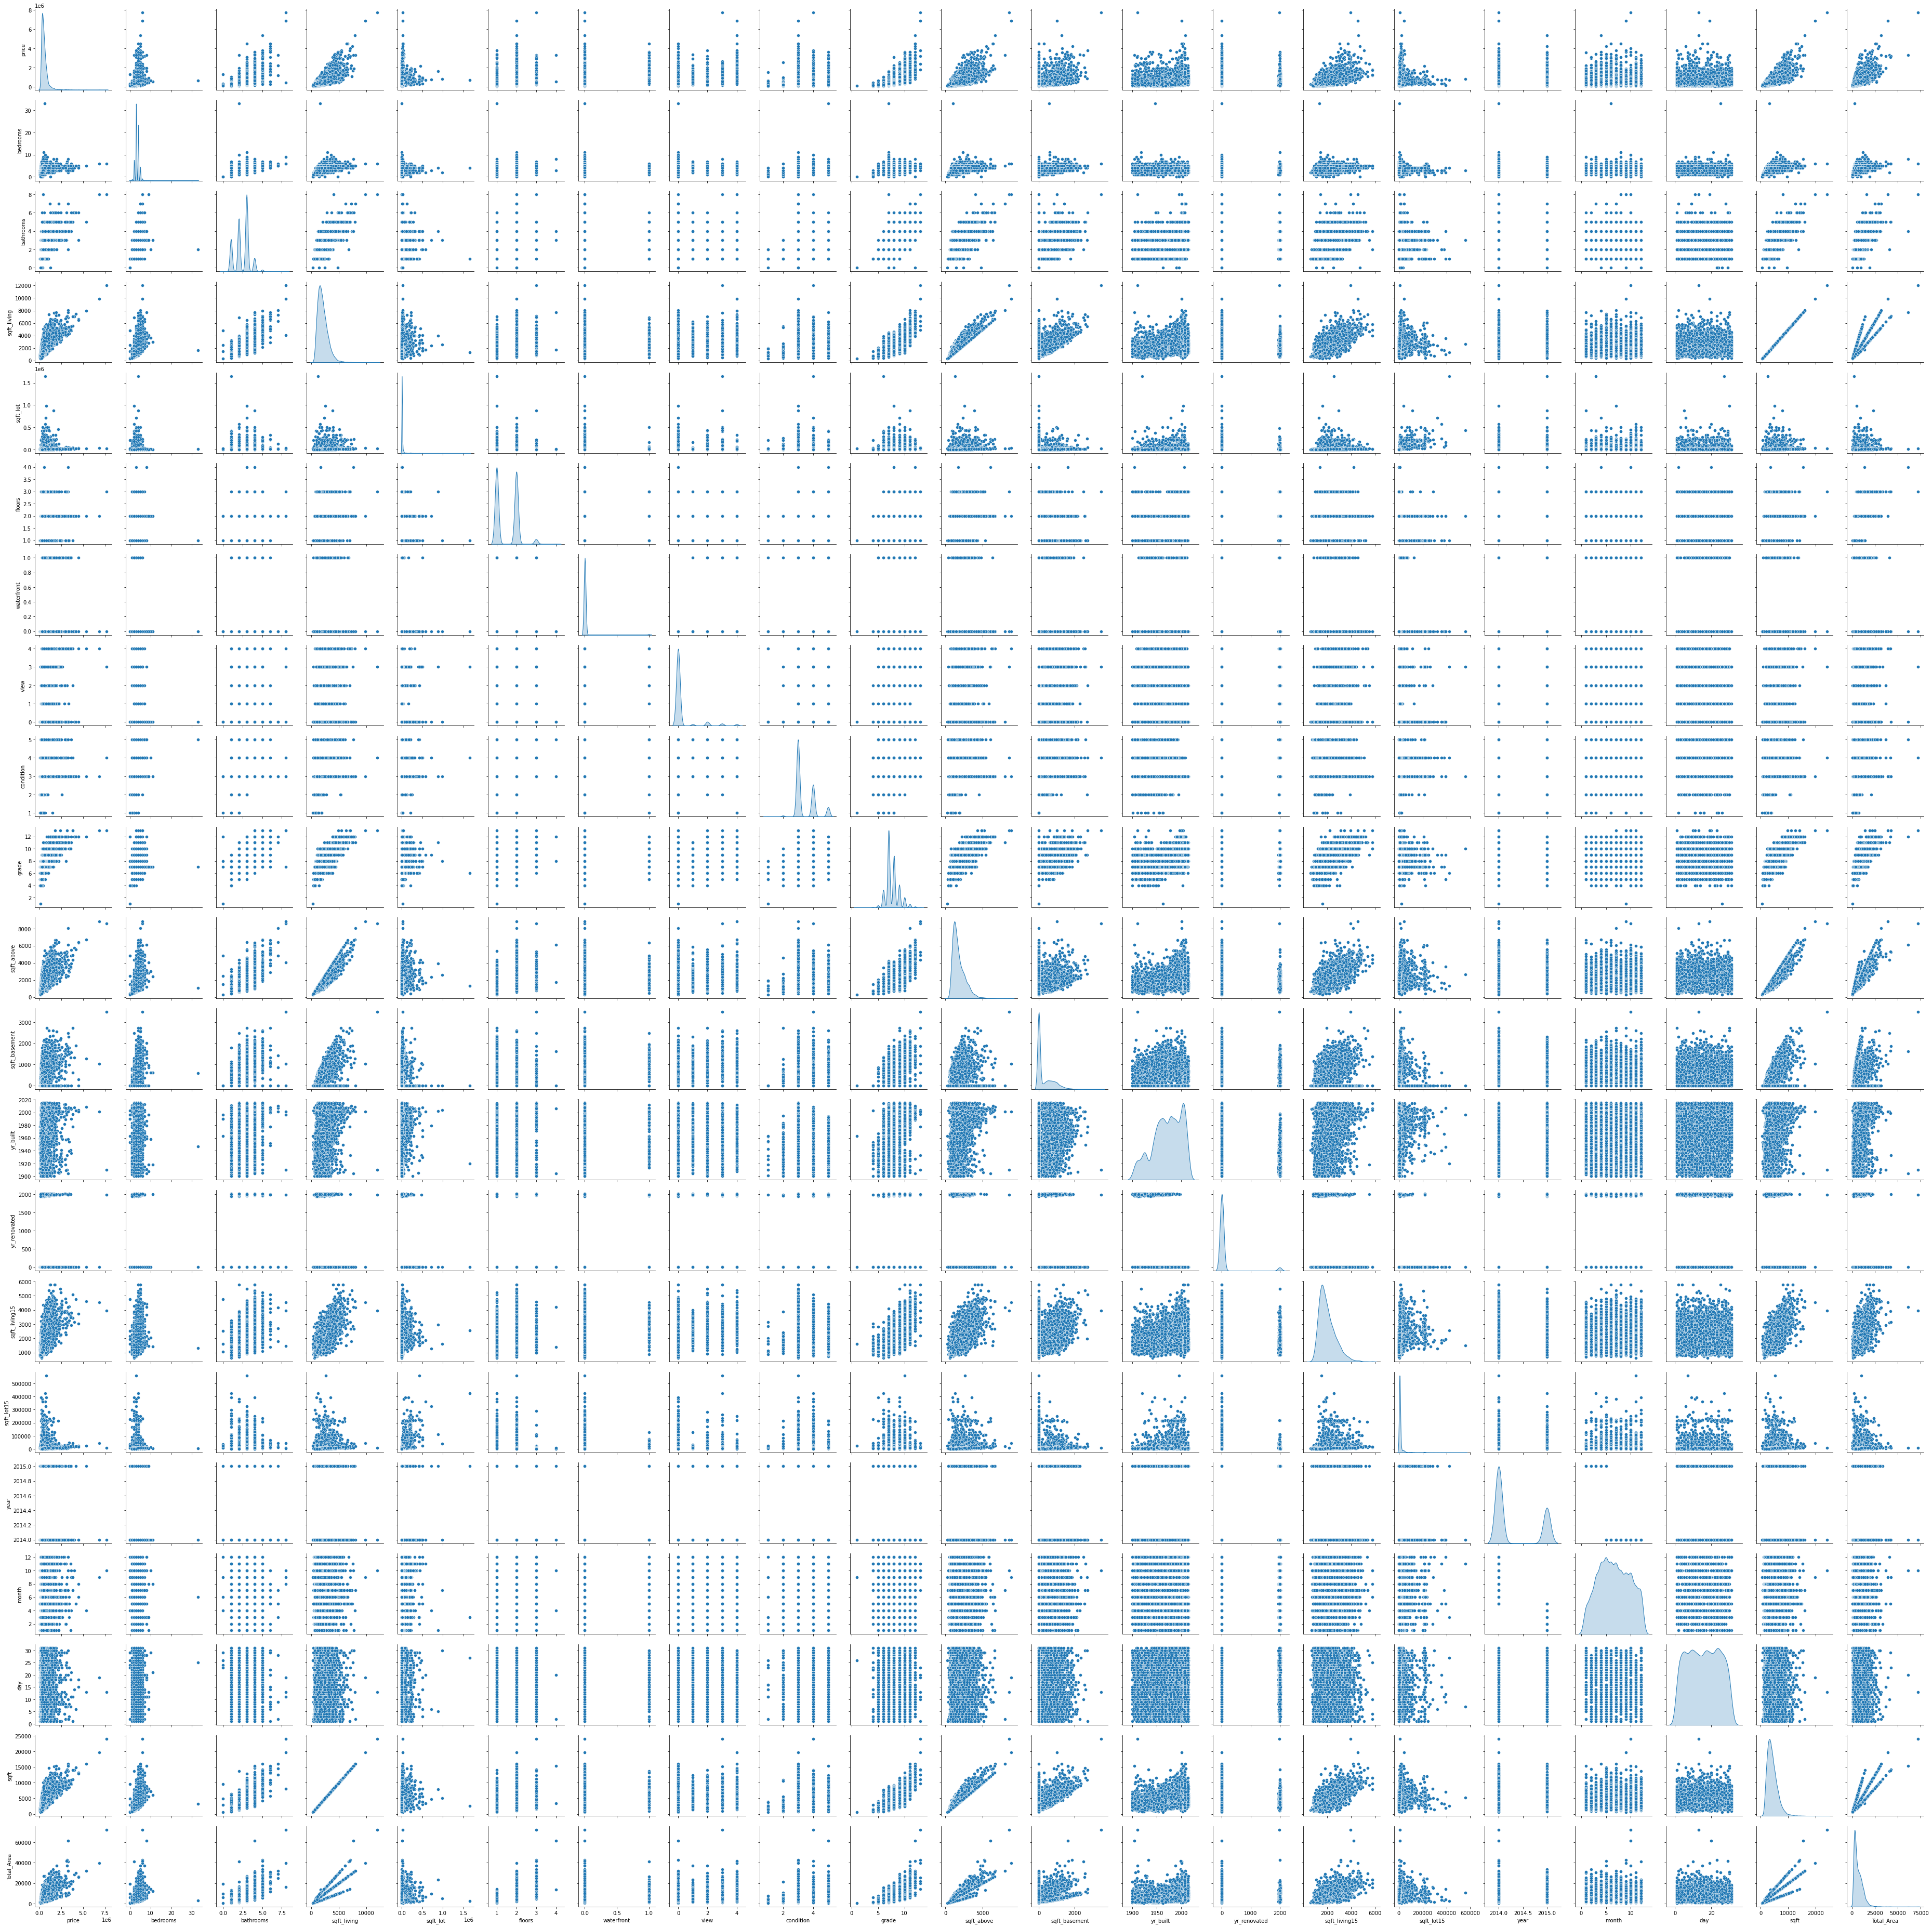

In [172]:
sns.pairplot(data = das1,diag_kind="kde")

<function matplotlib.pyplot.show(close=None, block=None)>

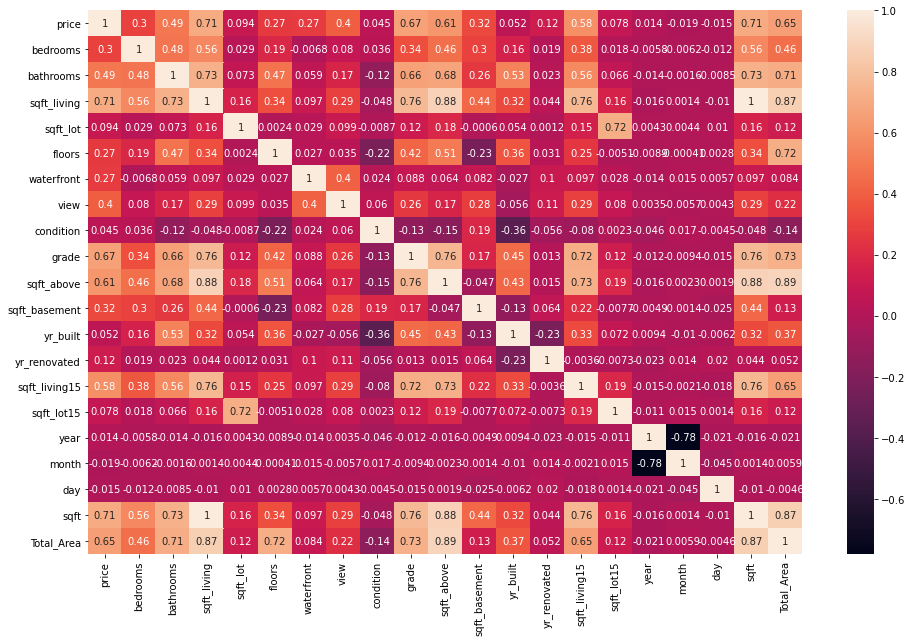

In [173]:
#Hat map for getting the best features of correlation
plt.figure(figsize=(16,10))
sns.heatmap(das1.corr(),annot=True)
plt.show

#### Testing on feature sets we created before

In [232]:
X = das1[['sqft','yr_built','bathrooms','grade']].values
y = das1['price'].values

In [220]:
kf()

MAPE: 0.08652053558993592
RMSE: 0.6257482301385443
R2: 0.6070285747795378


In [221]:
X = das1[['bedrooms','waterfront','sqft','grade']].values
y = das1['price'].values

In [222]:
kf()

MAPE: 0.04405350200593634
RMSE: 0.6531744101814814
R2: 0.581742731548362


In [223]:
X = das1[['sqft','view','sqft_lot','grade']].values
y = das1['price'].values

In [224]:
kf()

MAPE: 0.09461803807880871
RMSE: 0.656536011386567
R2: 0.5743548165343816


In [225]:
X = das1[['sqft','waterfront','grade','sqft_lot15']].values
y = das1['price'].values

In [226]:
kf()

MAPE: 0.04044204369114814
RMSE: 0.6553184304815464
R2: 0.5784190885289939


In [227]:
X = das1[['sqft','sqft_lot','waterfront','yr_built']].values
y = das1['price'].values

In [228]:
kf()

MAPE: 0.06290363301340172
RMSE: 0.6561642137277313
R2: 0.5708007488267346


In [230]:
X = das1[['sqft_living','yr_built','bathrooms','grade']].values
y = das1['price'].values

In [231]:
kf()

MAPE: 0.08652053558993592
RMSE: 0.6257482301385443
R2: 0.6070285747795378


#### Testing on different variable set by tranforming the variable

In [198]:
#Feature sets
X = das1.drop(['price','sqft_lot','floors','yr_renovated','sqft','sqft_living15','sqft_lot15','condition','bedrooms'],axis=1)
y = das1['price'].values

In [200]:
#X and y from data
X = das1[['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built','price']]
y = das1['price'].values

In [201]:
y = X['price'].values
X = X.drop('price',axis=1).values

In [202]:
#Score for given feature set
kf()

MAPE: 0.10617930533932869
RMSE: 0.593646824659652
R2: 0.647614496595919


In [193]:
#Feature sets
#X and y from data
X = das1[['view','sqft_living','grade','yr_built']].values
y = das1['price'].values

In [204]:
#Score for given feature set
kf()

MAPE: 0.10617930533932869
RMSE: 0.593646824659652
R2: 0.647614496595919


In [195]:
#Feature sets
#X and y from data
X = das1[['bedrooms','sqft_living','grade','yr_built','bathrooms']].values
y = das1['price'].values

In [196]:
#Score for given feature set
kf()

MAPE: 0.09188278867568306
RMSE: 0.6209876202880075
R2: 0.6142731373492991


#### These are the best features we got
['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']

In [320]:
X = das1[['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']].values
y = das1['price'].values

In [321]:
kf()

MAPE: 0.10617930533932869
RMSE: 0.593646824659652
R2: 0.647614496595919


### Decision tree

In [405]:
import numpy as np
import pandas as pd
import os

#for splitting the data
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#for fitting Regression tree
from sklearn.tree import DecisionTreeRegressor

#to create confusion matrix
from sklearn.metrics import confusion_matrix

data1 = pd.read_csv('wk3_kc_house_train_data.csv')
data1.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875  20141209T000000   604000.0         4       3.00         1960   
1  7237550310  20140512T000000  1225000.0         4       4.50         5420   
2  9212900260  20140527T000000   468000.0         2       1.00         1160   
3   114101516  20140528T000000   310000.0         3       1.00         1430   
4  6054650070  20141007T000000   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5000     1.0           0     0  ...      7        1050            910   
1    101930     1.0           0     0  ...     11        3890           1530   
2      6000     1.0           0     0  ...      7         860            300   
3     19901     1.5           0     0  ...      7        1430              0   
4      9680     1.0           0     0  ...      7        1370              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1965             0    98136  47.5208 -122.393           1360   
1      2001             0    98053  47.6561 -122.005           4760   
2      1942             0    98115  47.6900 -122.292           1330   
3      1927             0    98028  47.7558 -122.229           1780   
4      1977             0    98074  47.6127 -122.045           1370   

   sqft_lot15  
0        5000  
1      101930  
2        6000  
3       12697  
4       10208  

[5 rows x 21 columns]

In [406]:
#Initializing the predictors and label
X = data1[['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']].values
y = data1['price'].values

In [410]:
#Initializing the predictors and label
#data1['price']=np.log(data1['price'])
#data1['sqft']= data1['sqft_basement']+data1['sqft_above']+data1['sqft_living']
X = data1.drop(['price','lat','long','zipcode','date','id','sqft_above','sqft_living','sqft_basement'],axis=1)
#X = data1[['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']]
y = data1['price']

In [411]:
#Splitting the dataset into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

#Model creation and model fit for train data
model = DecisionTreeRegressor(max_depth= 6, min_samples_leaf=10)
model.fit(X_train,y_train)

#Model predictor
y_pred = model.predict(X_test)

In [412]:
#Predicted values
y_pred

array([ 322608.01534036, 1106923.07692308,  606919.60655738, ...,
        322608.01534036,  460120.00520833,  383468.78808706])

In [413]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('R Squared Score is:', r2_score(y_test, y_pred))

R Squared Score is: 0.6357213281585571


### Backward elimination forward selection

In [244]:
#Initializing the predictors and label
#data1['price']=np.log(data1['price'])
#X = data1.drop(['price','lat','long','zipcode','date','id'],axis=1)
X = data1[['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']]
#y = data1
#y['price'] = np.log(y['price'])
#y = y['price'].values
y = data1['price'].values

In [245]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
y_test = sc_y.fit_transform(y_test.reshape(-1,1))

In [246]:
import statsmodels.api as sm

In [247]:
#Adding constant
X_train = np.append(arr=np.ones((len(X_train),1)).astype(int),values=X_train,axis=1)

In [248]:
X_opt=X_train[:,[0,1,2,3,4,5,6,7,8]]

In [249]:
regressor_OLS = sm.OLS(endog=y_train,exog=X_opt).fit()

In [250]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     2099.
Date:                Mon, 24 May 2021   Prob (F-statistic):               0.00
Time:                        21:03:27   Log-Likelihood:                -6944.7
No. Observations:                7808   AIC:                         1.391e+04
Df Residuals:                    7800   BIC:                         1.396e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.028e-17      0.007   9.04e-15      1.000      -0.013       0.013
x1             0.0886      0.011      7.846      0.000       0.066       0.111
x2             0.1839      0.006     28.589      0.000       0.171       0.197
x3             0.1600      0.007     21.781      0.000       0.146       0.174
x4             0.0810      0.008     10.283      0.000       0.066       0.096
x5             0.4339      0.011     38.388      0.000       0.412       0.456
x6             0.1641      0.007     23.945      0.000       0.151       0.178
x7             0.0775      0.007     11.599      0.000       0.064       0.091
x8            -0.3050      0.008    -36.313      0.000      -0.321      -0.288
==============================================================================
Omnibus:                     5593.002   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           363124.777
Skew:                           2.799   Prob(JB):                         0.00
Kurtosis:                      35.937   Cond. No.                     9.38e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.27e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### The decision tree model got less score than the linear regression model

#### Testing on the final test dataset

### final decision tree

In [322]:
import numpy as np
import pandas as pd
import os

#for splitting the data
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#for fitting Regression tree
from sklearn.tree import DecisionTreeRegressor

#to create confusion matrix
from sklearn.metrics import confusion_matrix

data1 = pd.read_csv('wk3_kc_house_train_data.csv')
data1.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2487200875  20141209T000000   604000.0         4       3.00         1960   
1  7237550310  20140512T000000  1225000.0         4       4.50         5420   
2  9212900260  20140527T000000   468000.0         2       1.00         1160   
3   114101516  20140528T000000   310000.0         3       1.00         1430   
4  6054650070  20141007T000000   400000.0         3       1.75         1370   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5000     1.0           0     0  ...      7        1050            910   
1    101930     1.0           0     0  ...     11        3890           1530   
2      6000     1.0           0     0  ...      7         860            300   
3     19901     1.5           0     0  ...      7        1430              0   
4      9680     1.0           0     0  ...      7        1370              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1965             0    98136  47.5208 -122.393           1360   
1      2001             0    98053  47.6561 -122.005           4760   
2      1942             0    98115  47.6900 -122.292           1330   
3      1927             0    98028  47.7558 -122.229           1780   
4      1977             0    98074  47.6127 -122.045           1370   

   sqft_lot15  
0        5000  
1      101930  
2        6000  
3       12697  
4       10208  

[5 rows x 21 columns]

In [330]:
#Initializing the predictors and label
fda = pd.read_csv('wk3_kc_house_train_data.csv')
X_Train = fda.drop(['price','lat','long','zipcode','date','id','sqft_above','sqft_living','sqft_basement'],axis=1).values
y_Train = fda['price']

In [331]:
fda1= pd.read_csv('wk3_kc_house_test_data.csv')

In [332]:
X_Test = fda1[['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']].values
y_Test = fda1['price'].values

In [333]:
#Model creation and model fit for train data
model = DecisionTreeRegressor(max_depth= 6, min_samples_leaf=8)
model.fit(X_Train,y_Train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=8)

In [348]:
#Model predictor
y_pred = model.predict(X_Test)

In [349]:
#Predicted values
y_pred

array([327076.46770601, 581281.28378378, 487050.61611374, ...,
       545478.24456522, 438674.44761905, 438674.44761905])

In [350]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('R Squared Score is:', r2_score(y_Test,y_pred))

R Squared Score is: 0.6105002899418208


### Final LinearRegression

In [351]:
#Initializing the predictors and label
fda = pd.read_csv('wk3_kc_house_train_data.csv')
X_Train = fda[['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']].values
y_Train = fda['price'].values
fda1= pd.read_csv('wk3_kc_house_test_data.csv')
X_Test = fda1[['bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','yr_built']].values
y_Test = fda1['price'].values

In [354]:
MLG2(X_Train,y_Train,X_Test,y_Test)

[0.15385019724697566, 0.61724999429261, 0.6493399830605815]